In [1]:
import random
import numpy as np
import torch
from torch.utils.data import Subset
from torchvision import datasets, transforms
from einops import rearrange
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
transform = transforms.ToTensor()

mnist_train = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

# Randomized subset of 1000 images
subset_size = 1000
all_indices = torch.randperm(len(mnist_train))[:subset_size].tolist()
mnist_subset = Subset(mnist_train, all_indices)

print("Subset length:", len(mnist_subset))

# Checking if samples are in the required format
img0, y0 = mnist_subset[0]
print("Image shape:", img0.shape, "Label:", y0)

100%|██████████| 9.91M/9.91M [00:00<00:00, 40.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.12MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.72MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.9MB/s]

Subset length: 1000
Image shape: torch.Size([1, 28, 28]) Label: 8


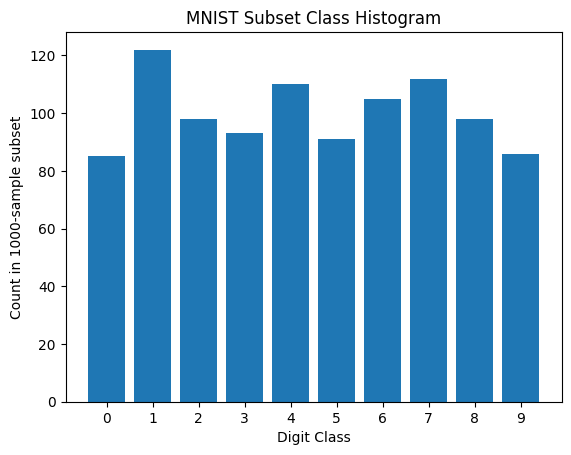

Counts per class: [85, 122, 98, 93, 110, 91, 105, 112, 98, 86]


In [3]:
# Histogram of classes in MNIST
labels = []
for i in range(len(mnist_subset)):
    _, y = mnist_subset[i]
    labels.append(int(y))

labels = np.array(labels)
counts = np.bincount(labels, minlength=10)

plt.figure()
plt.bar(np.arange(10), counts)
plt.xticks(np.arange(10))
plt.xlabel("Digit Class")
plt.ylabel("Count in 1000-sample subset")
plt.title("MNIST Subset Class Histogram")
plt.show()

print("Counts per class:", counts.tolist())

In [4]:
#

batch_size = 25

# Stack images into a single tensor of shape [1000, 1, 28, 28]
images = torch.stack([mnist_subset[i][0] for i in range(len(mnist_subset))], dim=0)
targets = torch.tensor([mnist_subset[i][1] for i in range(len(mnist_subset))])

print("Stacked images shape:", images.shape)   # [1000,1,28,28]
print("Targets shape:", targets.shape)         # [1000]

# We want: [NumBatches, BatchSize, 1, 28, 28]
# 1000 is divisible by 25 -> 40 batches
batched_images = rearrange(images, '(b s) c h w -> b s c h w', s=batch_size)
batched_targets = rearrange(targets, '(b s) -> b s', s=batch_size)

print("Batched images shape:", batched_images.shape)   # [40,25,1,28,28]
print("Batched targets shape:", batched_targets.shape) # [40,25]

Stacked images shape: torch.Size([1000, 1, 28, 28])
Targets shape: torch.Size([1000])
Batched images shape: torch.Size([40, 25, 1, 28, 28])
Batched targets shape: torch.Size([40, 25])


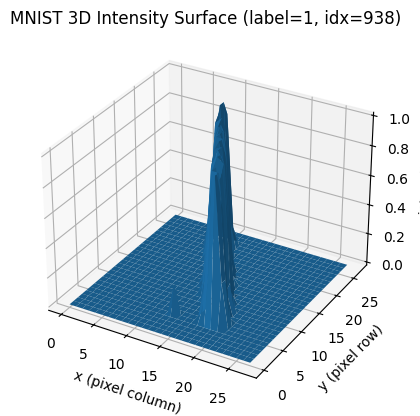

In [5]:
idx = random.randrange(subset_size)
img = images[idx, 0].numpy()  # [28,28] (single channel)
label = int(targets[idx].item())

# Create meshgrid for pixel coordinates
x = np.arange(28)
y = np.arange(28)
X, Y = np.meshgrid(x, y)

Z = img  # pixel intensity in [0,1]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Surface plot
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0)

ax.set_xlabel("x (pixel column)")
ax.set_ylabel("y (pixel row)")
ax.set_zlabel("intensity")
ax.set_title(f"MNIST 3D Intensity Surface (label={label}, idx={idx})")

plt.show()